In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# 1.load dataset
from this link " https://www.kaggle.com/datasets/yasserh/titanic-dataset "

In [19]:
data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 2. Data preprocessing

In [21]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
data["Age"] = data["Age"].fillna( data["Age"].mean() )

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
data.duplicated().sum()

np.int64(0)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
data = data.drop(columns= ['PassengerId', 'Name', 'Ticket'])

In [27]:
# Label encoding for each column in ls
ls = ['Sex', 'Cabin', 'Embarked']
label_encoding = data

for col in ls:
    label_encoding[col] = label_encoding[col].astype("category").cat.codes

label_encoding.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,-1,2
1,1,1,0,38.0,1,0,71.2833,81,0
2,1,3,0,26.0,0,0,7.9250,-1,2
3,1,1,0,35.0,1,0,53.1000,55,2
4,0,3,1,35.0,0,0,8.0500,-1,2


# 3.Data Exploration & Visualization

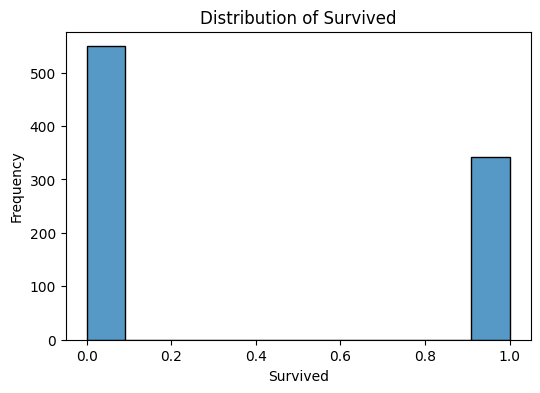

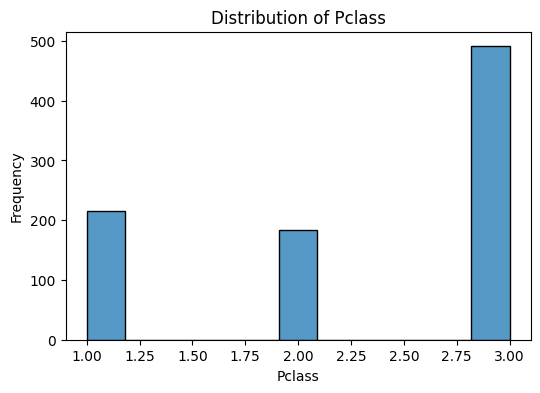

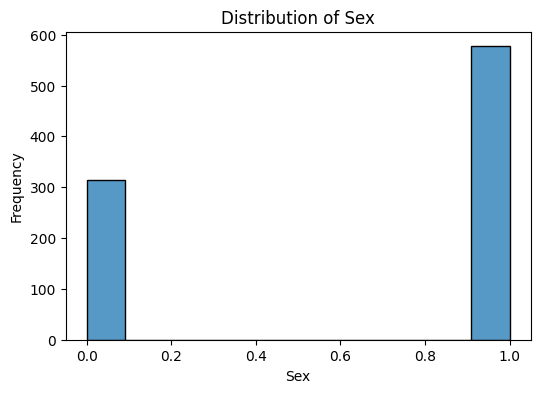

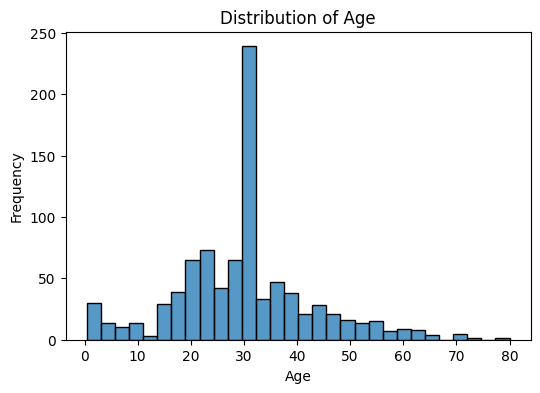

In [28]:
import matplotlib.pyplot as plt

visualize = ["Survived", "Pclass", "Sex", "Age"]

for col in visualize:
    
    plt.figure(figsize=(6,4))
    sns.histplot(label_encoding[col] )

    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [29]:
data_1 = label_encoding.drop("Survived", axis=1)

          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.338481 -0.543351 -0.069809 -0.035322  0.081629   
Pclass   -0.338481  1.000000  0.131900 -0.331339  0.083081  0.018443   
Sex      -0.543351  0.131900  1.000000  0.084153 -0.114631 -0.245489   
Age      -0.069809 -0.331339  0.084153  1.000000 -0.232625 -0.179191   
SibSp    -0.035322  0.083081 -0.114631 -0.232625  1.000000  0.414838   
Parch     0.081629  0.018443 -0.245489 -0.179191  0.414838  1.000000   
Fare      0.257307 -0.549500 -0.182333  0.091566  0.159651  0.216225   
Cabin     0.276235 -0.537419 -0.137704  0.157950 -0.024829  0.033585   
Embarked -0.176509  0.173511  0.118492 -0.039610  0.071480  0.043351   

              Fare     Cabin  Embarked  
Survived  0.257307  0.276235 -0.176509  
Pclass   -0.549500 -0.537419  0.173511  
Sex      -0.182333 -0.137704  0.118492  
Age       0.091566  0.157950 -0.039610  
SibSp     0.159651 -0.024829  0.071480  
Parch     0.216225  0.033585  0.0

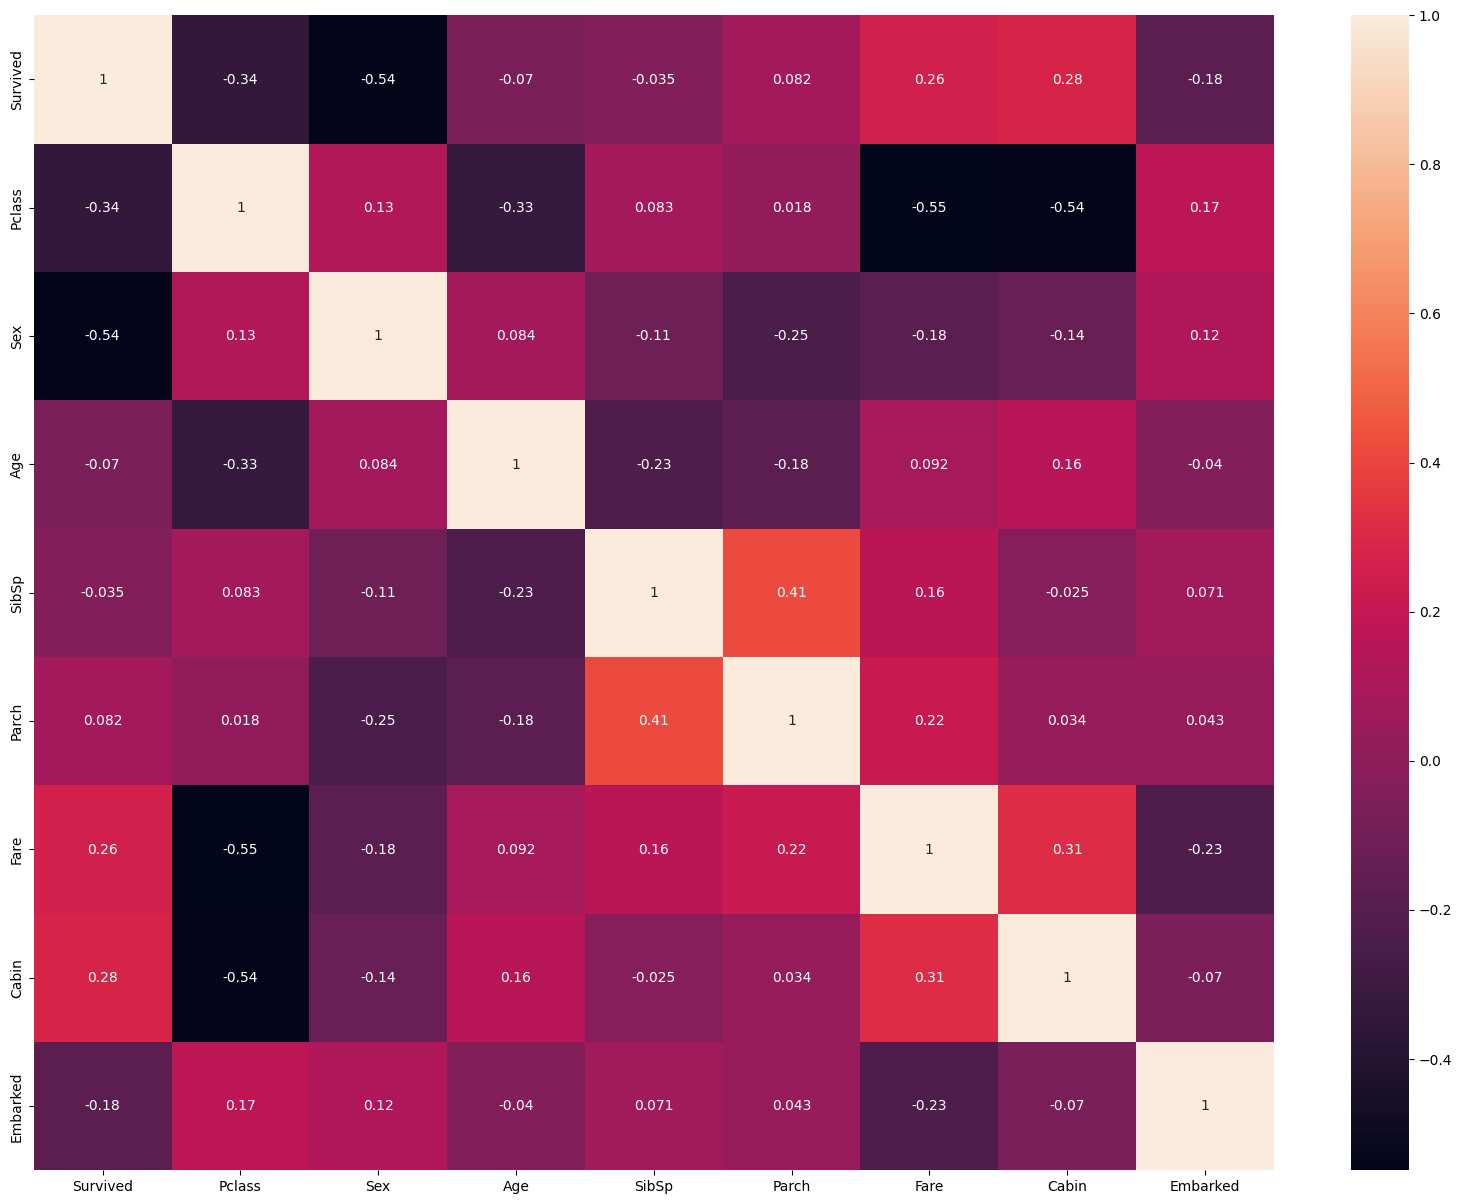

In [30]:
corr = label_encoding.corr(numeric_only = True)
print(corr)

plt.figure(figsize=(20,15))
sns.heatmap(corr , annot = True)
plt.show()

# 4. select model

In [31]:
from sklearn.model_selection import train_test_split

In [32]:

X = data_1
y = data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 5. model train

In [33]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


# 6.evaluation

In [34]:
y_pred = log_reg.predict(X_test)

print("Binary Classification Results (Titanic):")
print('-'*50)

print("Accuracy:", round(accuracy_score(y_test, y_pred), 2)*100, "%" )
print('-'*50)

print(confusion_matrix(y_test, y_pred))
print('-'*50)

print(classification_report(y_test, y_pred))
print('-'*50)

Binary Classification Results (Titanic):
--------------------------------------------------
Accuracy: 83.0 %
--------------------------------------------------
[[94 16]
 [15 54]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       110
           1       0.77      0.78      0.78        69

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

--------------------------------------------------
